In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [0]:
X = load_boston().data
Y = load_boston().target

In [0]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

21.963776602173308


In [5]:
#Printing Shape of Data
print(X.shape)
print(Y.shape)
 



(506, 13)
(506,)


### Splitting data into train and Test

In [0]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [0]:
def mse(ytest,ypred):
  sum_error = 0
  for i in range(len(ytest)):
       sum_error += (ytest[i] - ypred[i]) ** 2
        
  sum_error /= len(ytest)
  return sum_error


In [0]:
def predict(x,m_slope,b_intercept):
  return np.dot(x,m_slope)+b_intercept

### stochastic gradient descent

In [0]:
#https://gist.github.com/samueljackson92/8148506
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import math

cost_=[]
mse_train=[]
mse_test=[]
def SGD(x,y):
    '''
      This function stochastic gradient descent which return coefficient and intercept.
    
    '''
    iter=5000   # here we define variable named as iter for number of iteration
    learning_rate=0.1 #her we define learning_rate value
    cost_previous = 0 
    batch_size=50 # here in which we define number of batch size
    x_trans=x.T # here we tranponse the X(features)
    dimension,features=np.shape(x) # here we storing dimension and features in variable
    m_curr=np.ones(features) # here create number of zeroes in m_curr which is slope
    b_curr=0 
    
    
    for i in range(iter+1):
        idx=np.random.choice(len(x),batch_size,replace=False) # here we create idx variable which return random number of index of batch size
           
        #print(idx)
        y_predicted=np.dot(x[idx],m_curr)+b_curr # here we finding (y=w.T*X+b)
        
        #difference between actaul and pedicted values
        diff=y_predicted-y[idx]
       
        #finding cost function
        cost=np.sum(diff**2)/(2*dimension)
        cost_.append(cost)
        #findind coefficient
        gradient=np.dot(x_trans[:,idx],diff)/dimension
        
        #finding intercept
        bd = np.sum(diff)/dimension
        
        #updating the coefficient
        m_curr = m_curr - learning_rate *gradient
        #updating the intercept 
        b_curr = b_curr - learning_rate *bd
        
        
        mse_train.append(mse(yTrain,predict(xTrain,m_curr, b_curr)))
        mse_test.append(mse(yTest,predict(xTest,m_curr, b_curr)))
        
        #here we use match function to compare the cost
        if math.isclose(cost, cost_previous, rel_tol=1e-30):
            break
        cost_previous = cost
    #returing the coeffcint and intercept  
    
    return m_curr, b_curr,cost




In [0]:
m_slope,b_intercept,cost=SGD(X,Y)

In [25]:
m_slope

array([-0.85602203,  1.08523546,  0.08616195,  0.75789099, -2.01023193,
        2.61602856, -0.02856393, -3.15635658,  2.56454747, -2.0087431 ,
       -2.08479633,  0.79489218, -3.81064031])

In [31]:
b_intercept

22.554799446311126

In [0]:
def predict(x):
  return np.dot(x,m_slope)+b_intercept

#### Plot of  Cost vs Number of iterations 

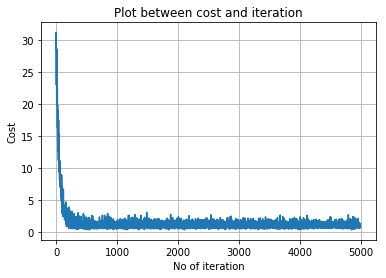

In [37]:
%matplotlib inline

plt.plot(cost_)
plt.xlabel("No of iteration")
plt.ylabel("Cost")
plt.title("Plot between cost and iteration")
plt.grid()

plt.show()

###  Plot MSE vs Number of iterations in order to check if the model is overfitting or not.

### Train MSE

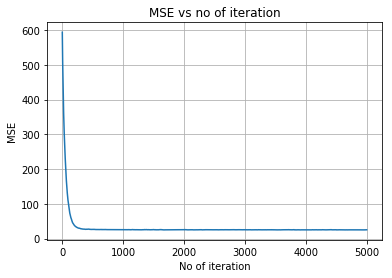

In [46]:
%matplotlib inline

plt.plot(mse_test)

plt.xlabel("No of iteration")
plt.ylabel("MSE")
plt.title("MSE vs no of iteration")
plt.grid()

plt.show()

### Test MSE

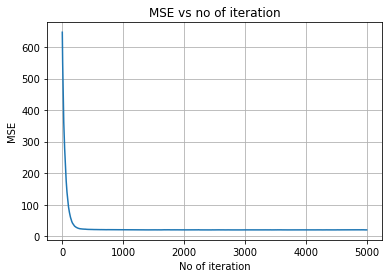

In [45]:
%matplotlib inline

plt.plot(mse_train,label='train')
plt.xlabel("No of iteration")
plt.ylabel("MSE")
plt.title("MSE vs no of iteration")
plt.grid()
plt.show()

####  Plot a chart of predicted values Vs actual values of your own SGD Implementation

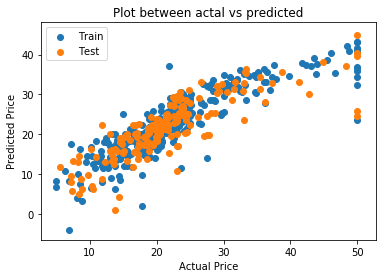

In [56]:
#Plot between actual vs predicted using SGD sklearn library of Train data
plt.scatter(yTrain,predict(xTrain),label='Train')
plt.scatter(yTest,predict(xTest),label='Test')
plt.xlabel("Actual Price")
plt.ylabel('Predicted Price')
plt.title('Plot between actal vs predicted')
plt.legend()
plt.show()

#### Now try out the SGDRegresser of sklearn and plot the chart of predicted values Vs actual values

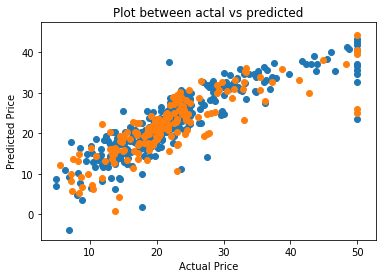

In [63]:
#Plot between actual vs predicted using  SGD  library of Test data
plt.scatter(yTrain,clf.predict(xTrain),label='Train')
plt.scatter(yTest,clf.predict(xTest),label="Test")
plt.xlabel("Actual Price")
plt.xlabel("Actual Price")
plt.ylabel('Predicted Price')
plt.title('Plot between actal vs predicted')
plt.show()

####   In a tabular format, compare the weights obtained from your own implementation with the weights obtained after applying sklearn's SGDRegresser.

In [79]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
print("SGDRegresser")
x.field_names = ["Weight of Custom SGD Function", "Weight of Sklern SGD Reg"]
x.add_row([(m_slope),(clf.coef_)])


print(x)

SGDRegresser
+--------------------------------------------------------------------------+--------------------------------------------------------------------------+
|                      Weight of Custom SGD Function                       |                         Weight of Sklern SGD Reg                         |
+--------------------------------------------------------------------------+--------------------------------------------------------------------------+
| [-0.89466272  1.07843128  0.10301994  0.70489956 -2.08607961  2.64928463 | [-0.86517887  0.97943951 -0.07546839  0.69504415 -1.95177153  2.70473415 |
|  -0.0350521  -3.03663337  2.54809359 -1.99933763 -2.07048419  0.8304194  |  -0.01187268 -3.07515148  2.09732622 -1.41988431 -2.01229951  0.82789557 |
|                               -3.67209778]                               |                               -3.69725482]                               |
+--------------------------------------------------------------------------

In [80]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
print("SGDRegresser")
x.field_names = ["MSE(Train) Sklearn", "MSE(Test)sklearn",'MSE(Train)Custom Fun','MSE(Test)Custom Fun']
x.add_row([(mean_squared_error(yTrain, clf.predict(xTrain))),(mean_squared_error(yTest, clf.predict(xTest))),mse(yTrain,predict(xTrain)),mse(yTest,predict(xTest))])


print(x)

SGDRegresser
+--------------------+--------------------+----------------------+---------------------+
| MSE(Train) Sklearn |  MSE(Test)sklearn  | MSE(Train)Custom Fun | MSE(Test)Custom Fun |
+--------------------+--------------------+----------------------+---------------------+
| 20.407412767436828 | 25.067295018186293 |  20.290961699069573  |  25.15623565111691  |
+--------------------+--------------------+----------------------+---------------------+
